In [194]:
%pylab inline
# pylab.rcParams['figure.figsize'] = (10, 6)
matplotlib.rc('font', family='NanumGothic')
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [177]:
"""
SELECT
  pass_score,
  gender,
  extract(YEAR FROM birthday) AS birthday,
  last_used_platform                           AS platform,
  CASE WHEN gender = 1
    THEN
      (SELECT count(*)
       FROM matchings
       WHERE male_id = users.id AND male_ok_date IS NOT NULL AND female_ok_date IS NOT NULL)
  ELSE
    (SELECT count(*)
     FROM matchings
     WHERE female_id = users.id AND male_ok_date IS NOT NULL AND female_ok_date IS NOT NULL)
  END
                                               AS matching,

  (SELECT count(*)
   FROM cards
   WHERE card_type = 0 AND user_id = users.id) AS liked,

  (SELECT count(*)
   FROM cards
   WHERE card_type = 1 AND user_id = users.id) AS like,

  (SELECT count(*)
   FROM cards
   WHERE card_type = 2 AND user_id = users.id) AS give_high_score,

  (SELECT count(*)
   FROM cards
   WHERE card_type = 4 AND user_id = users.id) AS given_high_score
FROM users
WHERE screen_status = 4 AND pass_score IS NOT NULL AND gender IS NOT NULL AND height IS NOT NULL;
"""
df = pd.read_csv('data/matching.csv')
males = df[df['gender'] == 1]
females = df[df['gender'] == 2]

(3, 5)

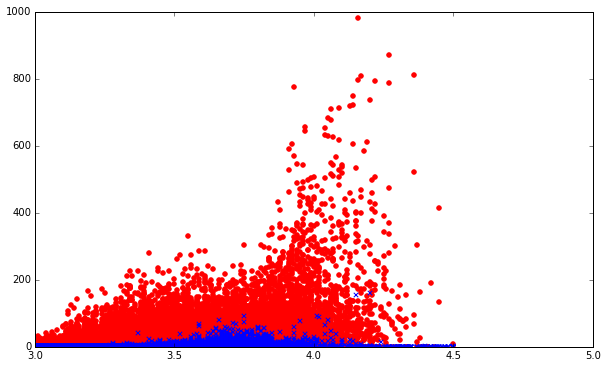

In [29]:
plt.scatter(females['pass_score'], females['liked'], marker='o', color='red')
plt.scatter(males['pass_score'], males['liked'], marker='x', color='blue')

plt.ylim(0, 1000)
plt.xlim(3, 5)

             user     sum        mean
pass_score                           
3.0          8225    5949    0.723283
3.1         10186   15454    1.517180
3.2          7338   29853    4.068275
3.3          7507   72803    9.698015
3.4          6676   90567   13.566058
3.5          6925  110902   16.014729
3.6          5307   93788   17.672508
3.7          3971   81800   20.599345
3.8          3338   91732   27.481126
3.9          2145  107089   49.924942
4.0           987   90136   91.323202
4.1           334   43149  129.188623
4.2           183   25859  141.306011
4.3            63   13455  213.571429
4.4            18    3966  220.333333
4.5             4     557  139.250000
             user   sum      mean
pass_score                       
3.0         38487   187  0.004859
3.1         40441   278  0.006874
3.2         23183   316  0.013631
3.3         17281   640  0.037035
3.4         11385  1338  0.117523
3.5          7850  4302  0.548025
3.6          4518  7778  1.721558
3.7       

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f82714d5f90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f8270e426d0>], dtype=object)

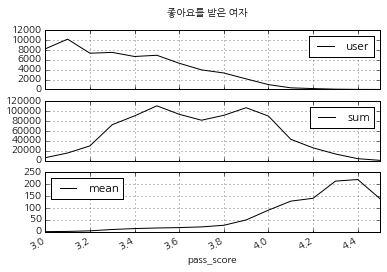

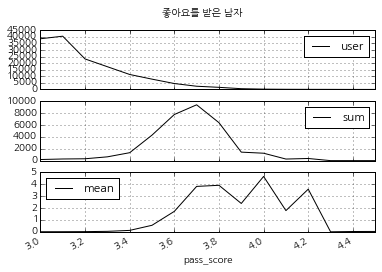

In [197]:
score_range = np.arange(3, 5.1, 0.1)
females2 = females.copy()
females2 = females2[females2['pass_score'] >= 3.0]
females2['pass_score'] = females2['pass_score'].apply(lambda score: round(score, 1))

males2 = males.copy()
males2 = males2[males2['pass_score'] >= 3.0]
males2['pass_score'] = males2['pass_score'].apply(lambda score: round(score, 1))

# avg_liked = {}
# for i in score_range:
#     liked = df[df['pass_score'] == i]['liked']
#     print i, liked.mean(), len(liked)
    
#     avg_liked[score_range]

female_liked = pd.DataFrame(data = {'user': females2.groupby('pass_score')['liked'].count(), 
            'sum': females2.groupby('pass_score')['liked'].sum(), 
            'mean':females2.groupby('pass_score')['liked'].mean()}, 
             columns=('user', 'sum', 'mean'))

male_liked = pd.DataFrame(data = {'user': males2.groupby('pass_score')['liked'].count(), 
            'sum': males2.groupby('pass_score')['liked'].sum(), 
            'mean':males2.groupby('pass_score')['liked'].mean()}, 
             columns=('user', 'sum', 'mean'))

print female_liked
plt.figure(1)
female_liked.plot(title=u'좋아요를 받은 여자', subplots=True)

plt.figure(2)
print male_liked
male_liked.plot(title=u'좋아요를 받은 남자', subplots=True)



# plt.plot(females['pass_score'].values, color='red')
# plt.xlim(3, 5)
# # score_range


